In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn
from pathlib import Path

In [2]:
#Load the data into a Pandas DataFrame
crypto_data_df = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

#Display sample data
crypto_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
#Generate summary statistics
crypto_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
#Plot your data to see what's in your DataFrame
crypto_data_df.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
#Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file, scale all columns with numerical values
crypto_data_scaled = StandardScaler().fit_transform(crypto_data_df[["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"]])

#Diplay the first five rows of the scaled data
crypto_data_scaled[0:5]

array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051],
       [-0.04076438, -0.81092807,  0.24945797, -0.05038797, -0.37316402,
        -0.45825882, -0.29554614],
       [ 1.19303608,  2.00095907,  1.76061001,  0.54584206, -0.29120287,
        -0.49984776, -0.27031695]])

In [6]:
#Create a DataFrame with the scaled data
crypto_data_scaled_df = pd.DataFrame(
    crypto_data_scaled,
    columns=["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"]
)

#Drop the unnecessary 'coinid' column
if 'coinid' in crypto_data_scaled_df.columns:
    crypto_data_scaled_df.drop(columns=['coinid'], inplace=True)

#Copy the crypto names from the original data
crypto_data_scaled_df['coin_id'] = crypto_data_df.index
             
#Set the coinid column as index
crypto_data_scaled_df.set_index('coin_id', inplace=True)

#Display sample data
crypto_data_scaled_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Data.

In [7]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [8]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(crypto_data_scaled_df)
    inertia.append(k_model.inertia_)

/Users/christopherkilkes/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/christopherkilkes/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/christopherkilkes/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/christopherkilkes/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/clus

In [9]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,123.190482
3,4,79.022435
4,5,65.302379


In [10]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** Initially based on visual examination of the k-means elbow curve, I believed that 3 clusters would be the most appropriate number to use for further analysis and comparison against PCA-transformed analysis. And that is how I originally built my k-means transformation model. However, upon completing the PCA data transformation model I found that both models worked best visually (as demonstrated, I believe, in the final composite vizualizations at the bottom of this exercise) to demonstrate a clear relationship between the two.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [11]:
# Initialize the K-Means model using the best value for k
# Define the model with optimal number of clusters
model = KMeans(n_clusters=4, random_state=0)

In [12]:
# Fit the K-Means model using the scaled data
model.fit(crypto_data_scaled_df)

/Users/christopherkilkes/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=0)

In [13]:
# Predict the clusters to group the cryptocurrencies using the scaled data
crypto_clusters = model.predict(crypto_data_scaled_df)

# Print the resulting array of cluster values.
print(crypto_clusters)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [14]:
# Create a copy of the DataFrame
crypto_data_scaled_predictions_df = crypto_data_scaled_df.copy()
#Drop the unnecessary 'Stock Clusters' column
if 'coinid' in crypto_data_scaled_df.columns:
    crypto_data_scaled_predictions_df.drop(columns=['Stock Clusters'], inplace=True)

In [32]:
# Add a new column to the DataFrame with the predicted clusters
crypto_data_scaled_predictions_df["Crypto Clusters"] = crypto_clusters

# Display sample data
crypto_data_scaled_predictions_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Crypto Clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,2
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,2
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,2
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,2


In [16]:
# Create a scatter plot using hvPlot by setting `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify the cryptocurrency represented by each data point.
#crypto_data_scaled_predictions_df.hvplot.scatter(
    #x="price_change_percentage_24h",
    #y="price_change_percentage_7d",
#)
import hvplot.pandas

#Create scatter plot
crypto_data_scaled_predictions_df.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="Crypto Clusters",  # Use the K-Means labels for coloring
    hover_cols=["coin_id"],  # Include cryptocurrency name in hover tooltips
    title="Cryptocurrency Price Changes",
    xlabel="24h Price Change (%)",
    ylabel="7d Price Change (%)",
    size=30,  # Optional: Adjust point size if needed
)


:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Crypto Clusters,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [17]:
from sklearn.decomposition import PCA
# Create a PCA model instance and set `n_components=3`.
pca=PCA(n_components=3)

In [18]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
crypto_data_scaled_pca = pca.fit_transform(crypto_data_scaled_df)
# View the first five rows of the DataFrame. 
crypto_data_scaled_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [19]:
# Retrieve the explained variance to determine how much information can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 72% of the variance is contained in two components with the remaining 18% being held by the third component.

In [33]:
# Create a new DataFrame with the PCA data.
crypto_data_scaled_pca_df = pd.DataFrame(
    crypto_data_scaled_pca,
    columns=["PCA1","PCA2","PCA3"]
)

#Drop the unnecessary 'coinid' column
if 'coinid' in crypto_data_scaled_pca_df.columns:
    crypto_data_scaled_pca_df.drop(columns=['coinid'], inplace=True)

#Copy the crypto names from the original data
crypto_data_scaled_pca_df['coin_id'] = crypto_data_df.index
             
#Set the coinid column as index
crypto_data_scaled_pca_df.set_index('coin_id', inplace=True)

#Display sample data
crypto_data_scaled_pca_df.head(10)



,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


---

### Find the Best Value for k Using the PCA Data

In [21]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [22]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(crypto_data_scaled_pca_df)
    inertia.append(k_model.inertia_)

/Users/christopherkilkes/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/christopherkilkes/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/christopherkilkes/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/christopherkilkes/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/clus

In [23]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)

# Review the DataFrame
df_elbow_pca.head()

,k,inertia
0,1,256.874086
1,2,168.811896
2,3,93.774626
3,4,49.665497
4,5,37.839466


In [24]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow_pca.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** Appears to be 4, same as in the k-means model.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, not visually.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [25]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)

In [26]:
# Fit the K-Means model using the PCA data
model.fit(crypto_data_scaled_pca_df)

/Users/christopherkilkes/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=0)

In [34]:
# Predict the clusters to group the cryptocurrencies using the PCA data
crypto_clusters_pca = model.predict(crypto_data_scaled_pca_df)
# Print the resulting array of cluster values.
crypto_data_scaled_pca_df.head(10)

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


In [35]:
# Create a copy of the DataFrame with the PCA data
crypto_data_scaled_pca_predictions_df = crypto_data_scaled_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
crypto_data_scaled_pca_predictions_df["Crypto Clusters"] = crypto_clusters_pca

# Display sample data
crypto_data_scaled_pca_predictions_df.head(10)

,PCA1,PCA2,PCA3,Crypto Clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2
binancecoin,-0.516534,1.388377,0.804071,2
chainlink,-0.450711,0.517699,2.846143,2
cardano,-0.345600,0.729439,1.478013,2
litecoin,-0.649468,0.432165,0.600303,2


In [29]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

#Create scatter plot
crypto_data_scaled_pca_predictions_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    c="Crypto Clusters",  # Use the K-Means labels for coloring
    hover_cols=["coin_id"],  # Include cryptocurrency name in hover tooltips
    title="Cryptocurrency Price Changes",
    xlabel="24h Price Change (%)",
    ylabel="7d Price Change (%)",
    size=30,  # Optional: Adjust point size if needed
)

:Scatter   [PCA1]   (PCA2,Crypto Clusters,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

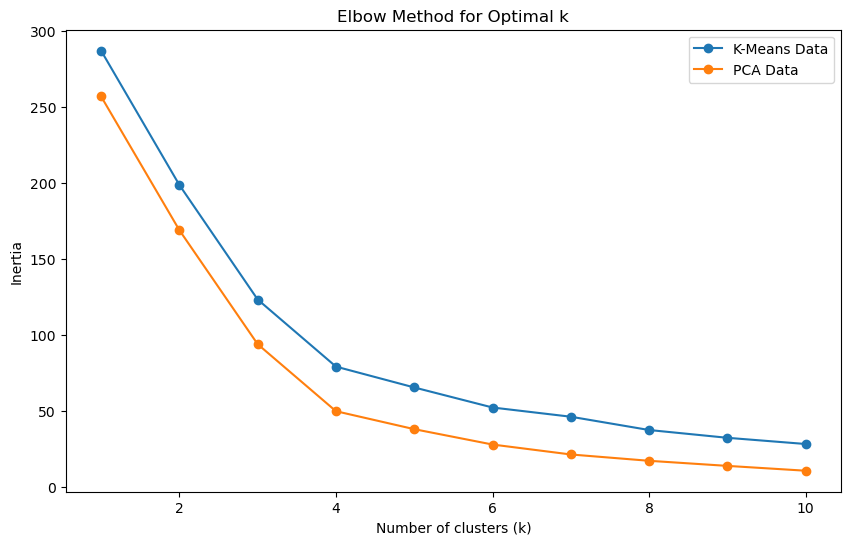

In [30]:
#Composite plot to contrast the Elbow curves
import matplotlib.pyplot as plt

#Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

#Plot the elbow chart for the k-means transformed data
ax.plot(df_elbow['k'], df_elbow['inertia'], label='K-Means Data', marker='o')

#Plot the elbow chart for the PCA-transformed data
ax.plot(df_elbow_pca['k'], df_elbow_pca['inertia'], label='PCA Data', marker='o')

#Add a title and labels
ax.set_title('Elbow Method for Optimal k')
ax.set_xlabel('Number of clusters (k)')
ax.set_ylabel('Inertia')

#Add a legend
ax.legend()

#Display the plot
plt.show()


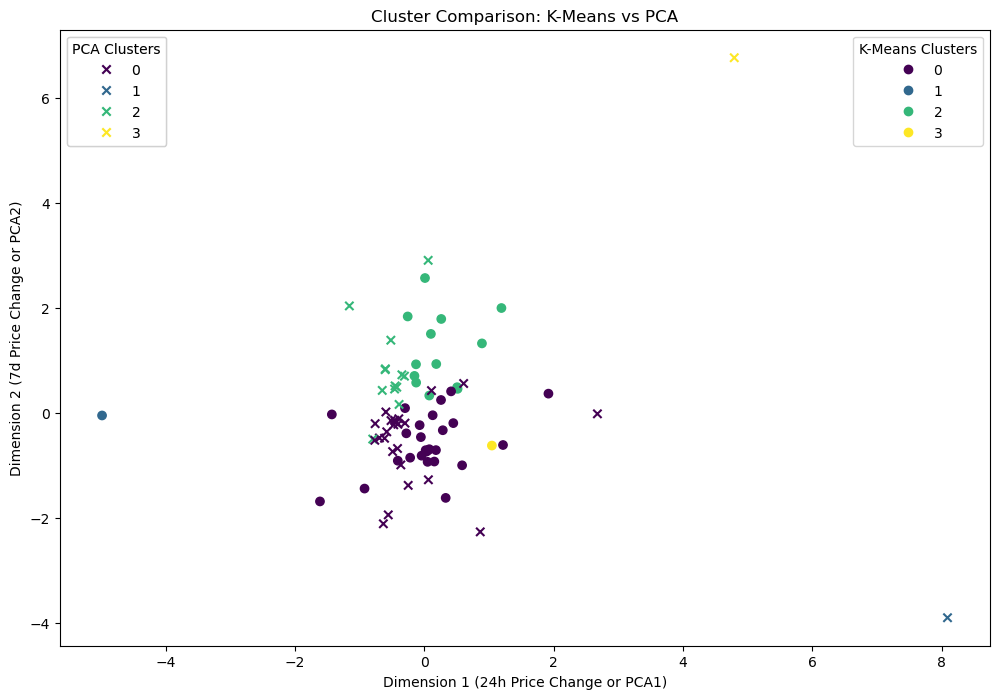

In [31]:
# Composite plot to contrast the clusters
#Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the K-Means data with original dimensions
scatter_kmeans = ax.scatter(
    crypto_data_scaled_predictions_df['price_change_percentage_24h'],
    crypto_data_scaled_predictions_df['price_change_percentage_7d'],
    c=crypto_data_scaled_predictions_df['Crypto Clusters'],
    #cmap='viridis',
    label='K-Means Data',
    #alpha=0.6
)

# Plot the PCA-transformed data with PCA components
scatter_pca = ax.scatter(
    crypto_data_scaled_pca_predictions_df['PCA1'],
    crypto_data_scaled_pca_predictions_df['PCA2'],
    c=crypto_data_scaled_pca_predictions_df['Crypto Clusters'],
    #cmap='plasma',
    label='PCA Data',
    marker='x',
    #alpha=0.6
)

# Add a title and labels
ax.set_title('Cluster Comparison: K-Means vs PCA')
ax.set_xlabel('Dimension 1 (24h Price Change or PCA1)')
ax.set_ylabel('Dimension 2 (7d Price Change or PCA2)')

# Add legends for both scatter plots
legend1 = ax.legend(*scatter_kmeans.legend_elements(), title="K-Means Clusters")
ax.add_artist(legend1)
legend2 = ax.legend(*scatter_pca.legend_elements(), title="PCA Clusters", loc="upper left")
ax.add_artist(legend2)

# Display the plot
plt.show()


#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** As noted previously, in the k-means elbow chart portion of this exercise, I originally believed 3 clusters worked best to demonstrate a visual pattern of data transformation effectively. However, upon completion of my PCA data transformation using both 3 and 4 clusters and then trying 4 clusters with my k-means analysis, I ended up using 4 clusters for both models in the final composite vizualization. Results seem similar across the same data set using both models but visually the results are much more clear cut and easier to understand than using fewer clusters as I originally intended. 